### Loading required liabraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import random
#import statsmodels.api as sm

### Loading and creating our Data Frame

In [2]:
df = pd.read_csv("salary.csv")
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### examining the data frame

In [3]:
df.shape

(514, 11)

The shape of our Data Frame tells us that we have 514 rows and 11 colums


In [4]:
print('Number of employee in the Data Frame is : ',len(df))

Number of employee in the Data Frame is :  514


In [5]:
null_values= df.isnull().sum().sum()
print('Number of missing values is: ',null_values)
null = df[df.salary.isnull()]
null

Number of missing values is:  1


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


We have 1 missing value in our salary colunm at index 208

In [6]:
df = df.dropna()
df.isnull().sum().sum()


0

We decided to drop our missing value as it is just one value.

In [7]:
df =df.rename(columns ={'male':'gender'})
df.gender = ['male' if i == 1
                  else
                  'female' for i in df.gender]


We decided to rename our male column to gender 

In [8]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,male,3,0
1,58000.0,1,0,0,1.24,1,0,1,male,2,0
2,45500.0,0,0,0,1.21,1,0,1,male,3,2
3,35782.0,0,2,1,0.99,1,0,1,male,4,1
4,34731.0,0,2,2,0.91,1,0,1,male,4,1


###  Splitting the data set to Training and Testing 

In [9]:
#df = pd.DataFrame(np.random.randn(100, 2))
#df_split = np.random.rand(len(df)) < 0.8
#df_train = df[df_split]
#df_test = df[df_split]
#df_test
#df_train.head()

In [10]:
train, test = train_test_split(df, test_size=0.2)
train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
29,39000.0,4,0,0,1.22,1,0,1,male,4,0
122,49667.0,0,12,4,0.88,1,0,2,male,2,0
354,63357.0,3,26,17,0.92,1,0,3,male,2,0
439,33703.0,1,6,1,0.77,1,0,2,female,3,0
471,45838.0,0,15,10,0.90,1,0,2,female,2,40


We randomly split our data into training and testing set. Our training  is 80 %  and our test set is 20 % of the original data.

### Examining the data set

In [11]:
train.shape

(410, 11)

Our training set has 410 rows and 11 columns

In [12]:
test.shape

(103, 11)

Our test set has 103 rows and 11 columns

In [13]:
print('Our minimum salary is :',train.salary.min())

Our minimum salary is : 29000.0


In [14]:
print('Our minimum salary is :',train.salary.max())

Our minimum salary is : 96156.0


### Checking for extreme values

In [15]:
q75, q25 = np.percentile(train['salary'], [75 ,25])
iqr = q75 - q25
print('Our interquatile range is :',iqr)

Our interquatile range is : 20057.5


In [16]:
cut_off = iqr * 1.5
cut_off_lower = q25 - cut_off
cut_off_upper = q75 + cut_off

In [17]:
cut_off_upper


90129.75

This is our upper limit for our salary range and any value greater than this will be classified as an outlier

In [18]:
cut_off_lower

9899.75

This is our lower limit for our salary range and any value less than this will be classified as an outlier

In [19]:
train['outlier_or_not'] = ['lower' if i < cut_off_lower else 'upper' if i > cut_off_upper else 'nothing' for i in train.salary]

/home/joyous/anacondas3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs,outlier_or_not
29,39000.0,4,0,0,1.22,1,0,1,male,4,0,nothing
122,49667.0,0,12,4,0.88,1,0,2,male,2,0,nothing
354,63357.0,3,26,17,0.92,1,0,3,male,2,0,nothing
439,33703.0,1,6,1,0.77,1,0,2,female,3,0,nothing
471,45838.0,0,15,10,0.90,1,0,2,female,2,40,nothing


In [21]:
x = train.outlier_or_not[train.outlier_or_not == 'upper']
x

377    upper
Name: outlier_or_not, dtype: object

From these result we can say we have an outlier at index 280 which is greater than the upper limit of the salary range

In [22]:
x = train.outlier_or_not[train.outlier_or_not == 'lower']
x

Series([], Name: outlier_or_not, dtype: object)

### Creatin histograms to show the distribution of the variables

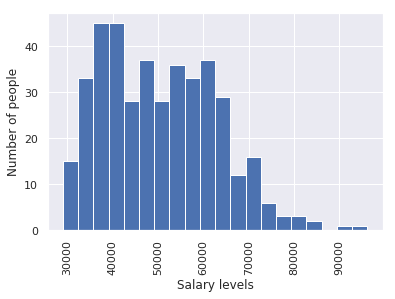

In [23]:
sns.set()
plt.hist(x= train.salary, bins=20)
plt.xlabel('Salary levels')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Number of people')
plt.show()

### Scatterplot showing the relationship between Years Worked and Salary

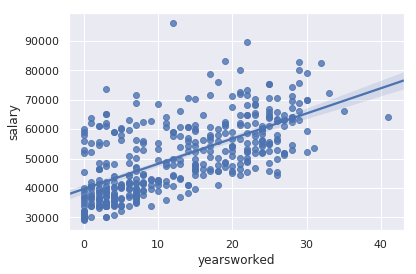

In [24]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=train)
plt.show()